PyTorch is an open-source machine learning library developed by Facebook's AI Research lab (FAIR). It is widely used for deep learning and other machine learning tasks. PyTorch is known for its flexibility, ease of use, and dynamic computation graph, which makes it popular among researchers and developers.

**Key Features of PyTorch:**

**Dynamic Computation Graph:** Unlike some other frameworks (like TensorFlow), PyTorch uses a dynamic computation graph, which means the graph is built on-the-fly as operations are performed. This makes it easier to debug and more intuitive to work with.

**Tensors:** PyTorch uses tensors, which are similar to NumPy arrays but can also be used on GPUs for faster computation. Tensors are the building blocks of PyTorch.

**Autograd:** PyTorch has an automatic differentiation engine called autograd that automatically computes gradients, which are essential for training neural networks.

**Neural Network Module:** PyTorch provides a module called torch.nn that makes it easy to build and train neural networks.

GPU Acceleration: PyTorch supports CUDA, which allows you to run your computations on a GPU for faster performance.

In [2]:
import torch
# Create tensor
t = torch.tensor([[1, 2, 3], [4, 5, 6]])
t

tensor([[1, 2, 3],
        [4, 5, 6]])

In [4]:
t.shape # check the shape of the tensor

torch.Size([2, 3])

In [5]:
t.t() # transpose

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In programming, particularly in data science and machine learning, transposing a matrix or tensor is a common operation. Transposing essentially means flipping a matrix over its diagonal, switching the row and column indices of the matrix.

Here are some reasons why you might want to transpose a matrix or tensor:

1. **Alignment for Operations:** Some mathematical operations, like matrix multiplication, require the matrices to be in a specific orientation. Transposing helps align the matrices correctly.

2. **Data Manipulation:** When working with datasets, transposing can help in reshaping the data for analysis or visualization. For example, converting rows to columns and vice versa.

3. **Algorithm Requirements:** Certain algorithms, especially in linear algebra and machine learning, require data to be in a transposed form for efficient computation.

Convenience: Sometimes, transposing a matrix can make the data more intuitive to work with or easier to understand.

In [6]:
# Create tensor of zeros
z = torch.zeros(3, 3)
z

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

# Numpy Support:

You can easily create a tensors from an ndarray and vice versa. These operations are fast, since the data of both structures will share the same memory space, and so no copying is involved.

In [14]:
# Numpy to torch tensor

import numpy as np

# Create a numpy array with random numbers
n = np.random.randn(1, 2)

# Convert numpy array to torch tensor
t = torch.from_numpy(n)

# Print the torch tensor
print(t)

# Print the type of numpy array
print(type(n))

# Print the type of torch tensor
print(type(t))

tensor([[ 1.4417, -0.8687]], dtype=torch.float64)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [15]:
t

tensor([[ 1.4417, -0.8687]], dtype=torch.float64)

In [16]:
n

array([[ 1.44168481, -0.86868425]])

In [17]:
n.shape

(1, 2)

In [18]:
# Tensor to numpy

n1 = t.numpy()
print(n1)
print(type(n1))

[[ 1.44168481 -0.86868425]]
<class 'numpy.ndarray'>


# Resizing:

If you want to resize/reshape tensor, you can use torch.view:

In [19]:
x = torch.randn(2, 2)
x

tensor([[ 0.0799, -1.5639],
        [-0.3006, -1.6935]])

In [20]:
print('Shape of x:',x.shape)

print('\n # of dimensions in x:',x.ndim)

Shape of x: torch.Size([2, 2])

 # of dimensions in x: 2


In [21]:
y = x.view(4)
print(y)

tensor([ 0.0799, -1.5639, -0.3006, -1.6935])


In [22]:
print('\n shape of the y:',y.shape)

print('\n # of dimensions in y:',y.ndim)


 shape of the y: torch.Size([4])

 # of dimensions in y: 1


In [31]:
z = x.view(-1, 2)  # the size -1 is inferred from other dimensions

print(z)

tensor([[ 0.0799, -1.5639],
        [-0.3006, -1.6935]])


In [24]:
print('\n shape of the z:',z.shape)

print('\n # of dimensions in z:',z.ndim)


 shape of the z: torch.Size([2, 2])

 # of dimensions in z: 2


# Autograd:

torch.autograd provides classes and functions implementing automatic differentiation of arbitrary scalar valued functions.

It requires minimal changes to the existing code - you only need to declare Tensors for which gradients should be computed with the requires_grad=True keyword.

In [32]:
from torch.autograd import Variable
#a = Variable(torch.Tensor([[1,2],[3,4]]), requires_grad=True)

a = torch.tensor([[1.0,2.0],[3.0,4.0]], requires_grad=True)

print(a)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [33]:
from torch.autograd import Variable
#a = Variable(torch.Tensor([[1,2],[3,4]]), requires_grad=True)

a = torch.tensor([[1.0,2.0],[3.0,4.0]], requires_grad=True)

print(a)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [34]:
y = torch.sum(a**3) # 1 + 8 + 27 + 64
print(y)

tensor(100., grad_fn=<SumBackward0>)


* gradients will be calculated when we will call the .backward() method

* grad.data will store the gradients

In [35]:
y.backward()       # compute gradients of y wrt a
print(a.grad.data)      # print dy/da_ij = 3*a_ij^2 for a_11, a_12, a21, a22

tensor([[ 3., 12.],
        [27., 48.]])


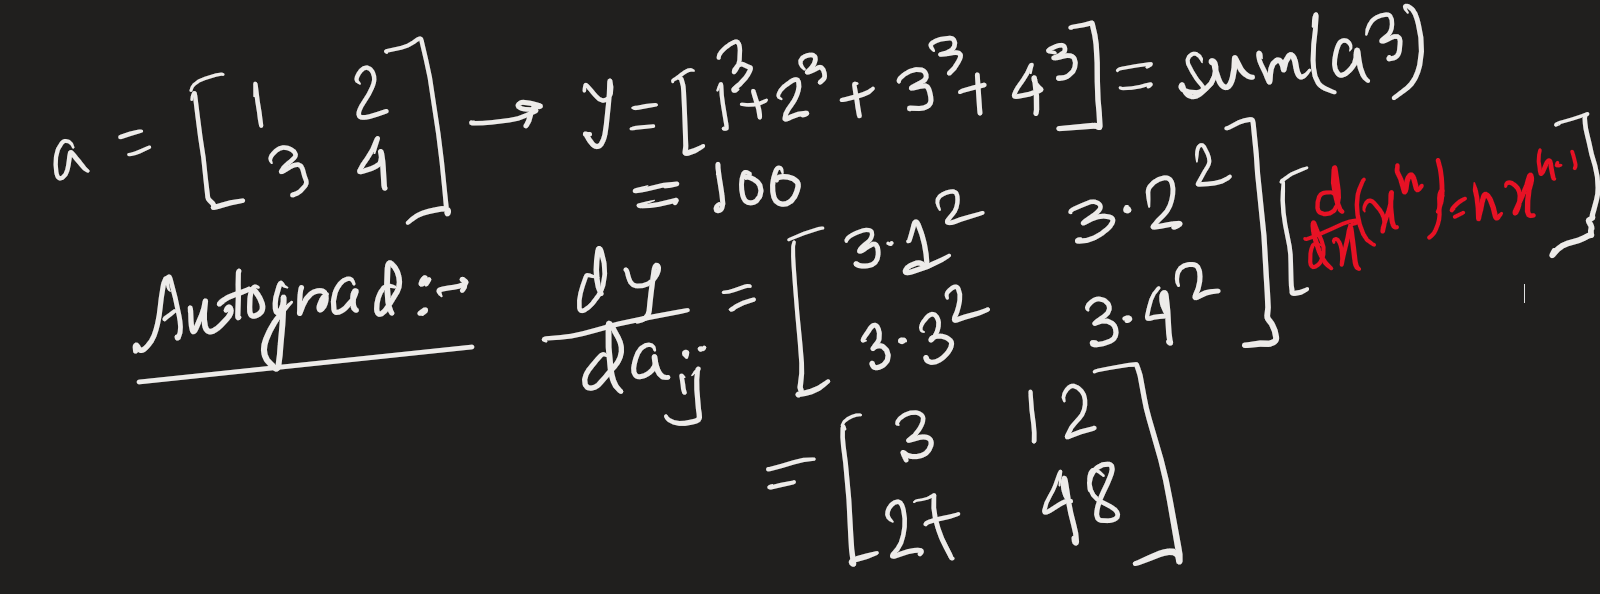

Simple Neaural Network Feedforward:
Mathematically this looks like:

 \begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
 

With vectors this is the dot/inner product of two vectors:

 $h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot $
$\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}$
 

we need to do dot/inner proudct between the input data with set of weights and then add the bias. Then we pass it through an activation function.

In [36]:
torch.manual_seed(2) # setting random seed for reproducability


torch.manual_seed(2) is a function in PyTorch that sets the random seed for generating random numbers. This ensures that any random operations in your code (like initializing weights in a neural network or shuffling data) will produce the same results every time you run the code.

# Why is this important?

In machine learning and deep learning, randomness is often used in:

1. Initializing model weights.

2. Shuffling datasets.

3. Dropping neurons in dropout layers.

4. Splitting data into training and testing sets.

If you don't set a random seed, the results of your code might change every time you run it, making it hard to debug or reproduce your work. By setting a random seed, you ensure that the randomness is `controlled` and `repeatable`.

# How does it work?

When you call `torch.manual_seed(2)`, PyTorch's random number generator is initialized with the seed value `2`. This means that any random operation after this will produce the same sequence of numbers every time you run the code.

In [40]:
# Example

import torch

# Set the random seed
torch.manual_seed(2)

# Generate random numbers
a = torch.rand(3)  # Random tensor of size 3
b = torch.rand(3)  # Another random tensor of size 3

print("Tensor a:", a)
print("Tensor b:", b)

Tensor a: tensor([0.6147, 0.3810, 0.6371])
Tensor b: tensor([0.4745, 0.7136, 0.6190])


**Output (First Run):**

Tensor a: tensor([0.6147, 0.3810, 0.6371])
Tensor b: tensor([0.4745, 0.7136, 0.6190])

**Output (Second Run):**

Tensor a: tensor([0.6147, 0.3810, 0.6371])
Tensor b: tensor([0.4745, 0.7136, 0.6190])

Notice that the random numbers are the same in both runs because we set the seed to `2`. If you remove `torch.manual_seed(2)`, the numbers will be different every time you run the code.

When to use `torch.manual_seed(2)?`

1. **Reproducibility:** When you want your experiments to produce the same results every time (e.g., for debugging or sharing code).

2. **Debugging:** When you want to isolate issues in your code by ensuring randomness doesn't affect the outcome.

3. **Testing:** When you want to compare different models or hyperparameters under the same conditions.

**Key Points:**

* torch.manual_seed(2) sets the random seed to 2.

* It ensures that random operations in PyTorch are repeatable.

* Use it when you need reproducible results in your machine learning experiments.

**Advanced Note:**

If you're using GPUs, you might also need to set the seed for CUDA operations using `torch.cuda.manual_seed(2)` to ensure reproducibility across GPU computations.

In [44]:
c = torch.randn((2, 5)) # 2,5 random normal input featutres/tensor
w = torch.rand_like(X) # weights with same dimension as features
b = torch.randn(1,1) # bias unit

In [45]:
c

tensor([[-0.4912, -0.0591, -1.5653,  0.4258, -1.4818],
        [-0.4766,  0.2480,  0.1559, -0.1607,  0.4172]])

1. c = torch.randn((2, 5))

What it does: This creates a 2D tensor (matrix) with random numbers drawn from a normal distribution (also called a Gaussian distribution). The normal distribution has a mean of 0 and a standard deviation of 1.

Shape: The tensor has 2 rows and 5 columns, so its shape is (2, 5).

Purpose: X represents input features. For example, if you have 2 data samples, each with 5 features, this tensor could represent those features.

In [46]:
w

tensor([[0.7536, 0.0727, 0.6463, 0.9804, 0.9441],
        [0.4921, 0.6659, 0.0310, 0.3406, 0.7438]])

2. w = torch.rand_like(X)

What it does: This creates a tensor w (weights) with the same shape as X, filled with random numbers drawn from a uniform distribution between 0 and 1.

Shape: Since X has a shape of (2, 5), w will also have a shape of (2, 5).

Purpose: w represents the weights of a model. In machine learning, weights are used to transform input features into outputs.

In [47]:
b

tensor([[1.0004]])

3. b = torch.randn(1, 1)

What it does: This creates a 2D tensor (matrix) with a single random number drawn from a normal distribution (mean 0, standard deviation 1).

Shape: The tensor has 1 row and 1 column, so its shape is (1, 1).

Purpose: b represents the bias unit in a model. The bias is added to the output of a linear transformation to adjust the result.

In [48]:
# Sigmoid activation function

def sigmoid(i):
    return 1/(1+torch.exp(-i))

In [49]:
# To check the shape of the tensor
w.shape

torch.Size([2, 5])

In [51]:
c.shape

torch.Size([2, 5])

As you might have guessed we cannot straightaway do - dot product of X and w as the inner dimnesions do not match here.We need the weight tensor to be a 5,2 tensor.

View function can help us to do that.
or we can do transpose of the w

In [52]:
w.view(5,2).shape , w.T.shape

(torch.Size([5, 2]), torch.Size([5, 2]))

Pytorch dot product

Unlike NumPy’s dot, torch.dot intentionally only supports computing the dot product of two 1D tensors with the same number of elements.

https://pytorch.org/docs/stable/generated/torch.dot.html#torch-dot

In [53]:
y = sigmoid((torch.dot(w,X.T)+b))
y

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [54]:
a = torch.tensor([2, 3])
b = torch.tensor([2, 1])
torch.dot(a, b)

tensor(7)

Pytorch Matrix Multiplication
https://pytorch.org/docs/stable/generated/torch.mm.html#torch-mm

In [56]:
z = torch.mm(c,w.T)+b
y = sigmoid(z)
y # showing output from single layer

tensor([[0.4091, 0.4288],
        [0.8804, 0.7669]])

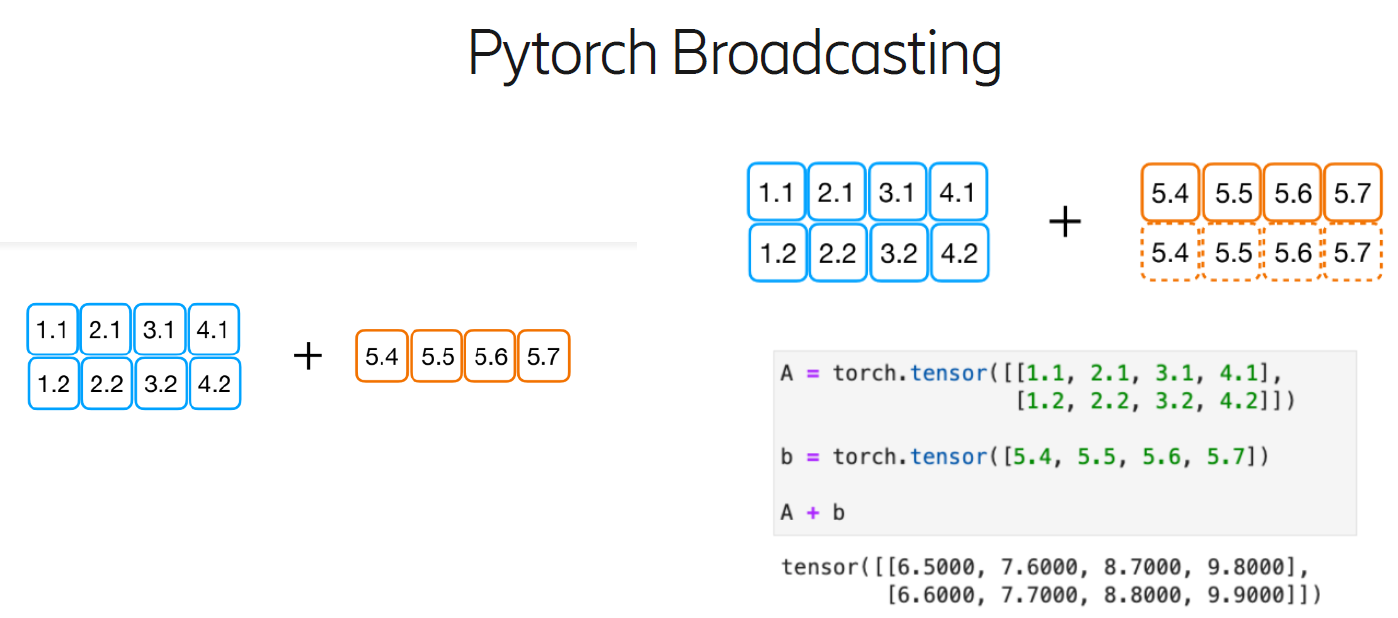

Broadcasting in PyTorch is a powerful feature that allows you to perform operations (like addition, subtraction, multiplication, etc.) on tensors of different shapes. It automatically expands the smaller tensor to match the shape of the larger tensor, so the operation can be performed element-wise.

# Why is Broadcasting Useful?

* It makes code simpler and more readable.

* It avoids the need to manually resize or repeat tensors to make their shapes match.

* It is memory-efficient because it doesn't actually create a larger tensor in memory; it just "virtually" expands the smaller tensor.

# How Does Broadcasting Work?

When you perform an operation on two tensors, PyTorch compares their shapes from right to left (starting from the last dimension). For broadcasting to work, the following rules must be satisfied:

1. Equal Dimensions: The dimensions of the two tensors must be equal, or

2. One of Them is 1: If the dimensions are not equal, one of them must be 1.

If these conditions are met, PyTorch automatically "broadcasts" the smaller tensor to match the shape of the larger tensor.